# i. Perkenalan
Marchelly Gideon Tambunan\

- Dataset: riwayat perjalanan Uber and Lyft di Boston 
- Objektif: untuk memprediksi harga perjalanan dari Uber dan Lyft menggunakan Linear Regression

## Problem Statement

`Buatlah model Regression menggunakan Linear Regression untuk memprediksi harga perjalanan platform ride-hailing dengan dataset yang disediakan.`

# ii. Import Libraries

In [13]:
# Define Libraries

import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# For Regression Problems
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# For Classification Problems
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Split Dataset and Standarize the Datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#Encoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# Evaluate Regression Models
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Evaluate Classification Models
from sklearn.metrics import roc_auc_score

pd.set_option('display.max_columns', None)
pd.reset_option('max_columns')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

#save model
import joblib
import json

from statsmodels.graphics.gofplots import qqplot
from yellowbrick.regressor import ResidualsPlot

# iii. Data Loading

In [14]:
df = pd.read_csv('/content/drive/MyDrive/GC1/h8dsft_P1W1_Marchelly_Gideon.csv',na_values=[" ", "-", "?" ,"n/a", "na", "--"])
df.head(5)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


setelah kita melakukan loading data, kita akan melakukan duplikasi data

In [15]:
data = df.copy()

mari kita cek ada apa saja kolom dan tipe data yang kita punya

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

ternyata pada kolom datetime memiliki tipe data object dan kita harus mengubahnya menjadi datetime

In [17]:
pd.to_datetime(data['datetime'])

0        2018-12-16 09:30:07
1        2018-11-27 02:00:23
2        2018-11-28 01:00:22
3        2018-11-30 04:53:02
4        2018-11-29 03:49:20
                 ...        
693066   2018-12-01 23:53:05
693067   2018-12-01 23:53:05
693068   2018-12-01 23:53:05
693069   2018-12-01 23:53:05
693070   2018-12-01 23:53:05
Name: datetime, Length: 693071, dtype: datetime64[ns]

mengecek kembali tipe data pada dataset kita

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

mari kita cek apakah ada missing value atau tidak

In [19]:
data.isna().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

ternyata ada beberapa missing value pada kolom price. dan kita akan menghapus missing value tersebut karena kita akan menggunakan price sebagai target

In [20]:
data.dropna(axis=0,inplace = True)

In [21]:
data.isna().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

sudah tidak ada missing values pada dataset yang kita miliki. selanjutnya, kita akan melakukan reset index dan melihat dimensi dari data tersebut

In [22]:
data.reset_index()
data.shape

(637976, 57)

# iv. Exploratory Data Analysis (EDA)

pada bagian ini, kita akan melakukan beberapa eksplorasi data untuk memahami data yang kita miliki

In [23]:
data['price'].agg(['min','max'])

min     2.5
max    97.5
Name: price, dtype: float64

<AxesSubplot:xlabel='name'>

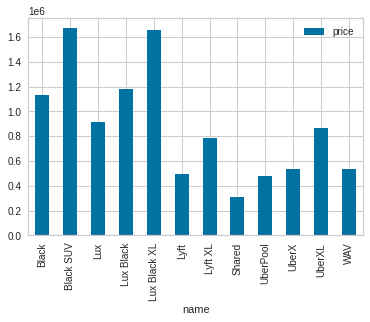

In [24]:
data.groupby('name')[['price']].sum().plot(kind='bar')

ternyata dari jumlah price yang terbanyak ada pada Lux Black XL dan Black SUV

In [25]:
data.groupby('source')[['price']].mean()

,price
source,
Back Bay,16.047394
Beacon Hill,15.664030
Boston University,18.853034
Fenway,18.379491
Financial District,18.181372
Haymarket Square,13.578114
North End,15.153373
North Station,16.364006
Northeastern University,17.901124


rata-rata harga perjalanan didapat paling tinggi dari Bacon University

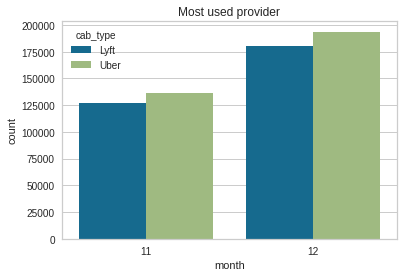

In [26]:
plt.figure(figsize=(6,4))
sns.countplot(x='month', data=data, hue='cab_type')
plt.title('Most used provider')
plt.show()

hasil diatas terlihat bahwa uber merupakan cab_typr yang lebih banyak digunakan daripada lyft dalam 2 bulan terakhir

sekarang kita akan melihat tanggal pertama dan terakhir yang ada pada data yang kita miliki

In [27]:
data.datetime.agg(['min','max'])

min    2018-11-26 03:40:46
max    2018-12-18 19:15:10
Name: datetime, dtype: object

ternyata dari rentang waktu tersebut, pada bulan 12 lebih tinggi karena pada bulan tersebut memiliki lebih banyak data yang terekam dibanding bulan 11

mari kita lihat ada apa saja product_id yang kita miliki

In [28]:
data['product_id'].value_counts()

6f72dfc5-27f1-42e8-84db-ccc7a75f6969    55096
9a0e7b09-b92b-4c41-9779-2ad22b4d779d    55096
6d318bcc-22a3-4af6-bddd-b409bfce1546    55096
6c84fd89-3f11-4782-9b50-97c468b19529    55095
55c66225-fbe7-4fd5-9072-eab1ece5e23e    55094
997acbb5-e102-41e1-b155-9df7de0a73f2    55091
lyft_premier                            51235
lyft                                    51235
lyft_luxsuv                             51235
lyft_plus                               51235
lyft_lux                                51235
lyft_line                               51233
Name: product_id, dtype: int64

menurut saya, kode unik diatas merupakan kode unik dari cab_type uber

mari kita cari korelasi price dengan kolom numerik terlebih dahulu karena kolom price yang akan menjadi target kita

In [29]:
num_corr = data.corr()
num_corr

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
timestamp,1.000000,-0.028501,-0.341420,0.771245,0.000808,0.003290,0.000611,0.168295,-0.136716,-0.249027,-0.226472,-0.179834,-0.147351,-0.167740,-0.066364,0.005565,0.998843,0.158577,-0.228324,0.999332,-0.366885,0.999175,-0.215550,0.999312,-0.402043,0.999204,-0.265512,0.533074,-0.133853,-0.081522,-0.025986,0.158577,0.196566,0.999372,0.999372,-0.846279,-0.211887,0.999364,-0.307194,0.998195,-0.186495,0.999290,-0.378538,0.998288,-0.157891,0.999276
hour,-0.028501,1.000000,0.066223,-0.079734,0.000561,0.002283,-0.000067,0.019228,-0.005986,0.218829,0.198212,-0.233246,-0.129631,-0.275778,0.073011,0.077646,-0.028544,0.173776,0.005191,-0.028323,0.015000,-0.027267,0.005518,-0.028481,0.015722,-0.027438,0.004863,-0.067787,0.036292,0.026680,0.330326,0.173776,0.034035,-0.028016,-0.028014,0.020997,0.020288,-0.027997,0.015668,-0.027486,0.002982,-0.028479,0.015882,-0.028172,0.002904,-0.028273
day,-0.341420,0.066223,1.000000,-0.861325,-0.000722,-0.000992,0.001397,0.006744,0.078539,-0.083934,-0.223410,0.091513,0.030765,-0.093376,0.440512,0.402611,-0.336560,0.105210,-0.283410,-0.343251,-0.088370,-0.333686,-0.398099,-0.343422,-0.192984,-0.335630,-0.101470,-0.444738,0.092226,-0.041103,-0.012083,0.105210,0.376791,-0.341201,-0.341145,-0.007038,0.145789,-0.341330,0.038089,-0.334118,-0.304704,-0.344669,-0.019878,-0.335176,-0.444366,-0.344546
month,0.771245,-0.079734,-0.861325,1.000000,0.000913,0.002402,-0.000612,0.085946,-0.126763,-0.082048,0.024773,-0.154356,-0.097803,-0.022078,-0.334897,-0.270541,0.767339,0.011129,0.068094,0.772119,-0.138703,0.765551,0.152479,0.772227,-0.087019,0.766883,-0.074906,0.589683,-0.135317,-0.016767,-0.012340,0.011129,-0.149111,0.770749,0.770712,-0.452655,-0.213301,0.770832,-0.191928,0.765319,0.105113,0.773057,-0.191293,0.766097,0.214928,0.772962
price,0.000808,0.000561,-0.000722,0.000913,1.000000,0.345061,0.240458,0.002088,-0.001417,-0.000084,-0.000193,0.000166,-0.000243,-0.001238,0.000990,0.001218,0.000851,0.001497,-0.000516,0.000759,0.000182,0.000754,-0.000261,0.000741,0.000831,0.000761,-0.000615,0.000866,-0.001382,0.000883,-0.000424,0.001497,0.000460,0.000760,0.000760,-0.001602,0.001114,0.000763,-0.000428,0.000769,-0.000550,0.000766,-0.000580,0.000814,-0.000290,0.000746
distance,0.003290,0.002283,-0.000992,0.002402,0.345061,1.000000,0.025946,0.000984,-0.000415,-0.002738,-0.002835,-0.000512,0.000134,-0.003849,0.001709,0.000920,0.003371,0.004143,-0.003795,0.003338,-0.001744,0.003282,-0.003699,0.003317,-0.001006,0.003311,-0.003920,0.003565,-0.002638,-0.000958,0.002422,0.004143,0.001206,0.003291,0.003291,-0.004301,0.000670,0.003298,-0.003192,0.003166,-0.003875,0.003318,-0.003649,0.003266,-0.003889,0.003319
surge_multiplier,0.000611,-0.000067,0.001397,-0.000612,0.240458,0.025946,1.000000,0.001471,-0.001961,-0.001594,-0.002586,-0.001522,-0.002825,-0.001677,0.002593,0.002162,0.000477,0.001716,-0.001943,0.000560,-0.002669,0.000614,-0.002098,0.000559,-0.003088,0.000592,-0.001860,-0.003109,0.002171,-0.002101,-0.002567,0.001716,0.003456,0.000585,0.000585,-0.000163,-0.000090,0.000585,-0.000716,0.000594,-0.001998,0.000563,-0.001317,0.000502,-0.002214,0.000559
latitude,0.168295,0.019228,0.006744,0.085946,0.002088,0.000984,0.001471,1.000000,-0.531443,-0.098909,-0.067427,-0.074306,-0.071331,-0.117721,-0.097125,0.024346,0.172786,0.124286,-0.115623,0.173857,-0.032005,0.171345,-0.092459,0

yang memiliki korelasi dengan kolom price adalah kolom distance dan kolom surge_multiplier

selanjutnya kita akan mencari korelasi kolom price dengan kolom kategorical lainnya

In [30]:
cat_corr = pd.get_dummies(data[['price','cab_type' ,'source', 'destination','product_id','name','surge_multiplier']]).corr()
cat_corr

,price,surge_multiplier,cab_type_Lyft,cab_type_Uber,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,product_id_55c66225-fbe7-4fd5-9072-eab1ece5e23e,product_id_6c84fd89-3f11-4782-9b50-97c468b19529,product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546,product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969,product_id_997acbb5-e102-41e1-b155-9df7de0a73f2,product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,product_id_lyft,product_id_lyft_line,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_plus,product_id_lyft_premier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
price,1.000000,0.240458,0.083385,-0.083385,-0.016101,-0.028396,7.463391e-02,5.931667e-02,0.053468,-0.095924,-0.045006,-0.005821,0.043847,-0.028216,0.001678,-0.014092,-0.010834,-0.009565,0.077515,5.177998e-02,0.049051,-0.074040,-0.049891,0.008360,0.041467,-0.055504,-0.018458,-0.010306,-0.223551,0.131185,4.530961e-01,-2.858656e-02,-2.569295e-01,-2.235570e-01,-0.219756,-3.332354e-01,0.206544,0.500057,-0.039163,0.038857,0.131185,4.530961e-01,0.038857,0.206544,0.500057,-0.219756,-0.039163,-3.332354e-01,-2.569295e-01,-0.223551,-2.858656e-02,-2.235570e-01
surge_multiplier,0.240458,1.000000,0.163745,-0.163745,0.044629,0.006232,2.180054e-02,2.546216e-02,-0.009404,-0.040097,-0.040184,-0.030372,0.026088,-0.003967,0.028676,-0.028992,-0.000353,-0.005106,0.004403,1.332335e-03,-0.000253,0.001046,0.002894,-0.000669,0.000278,0.000937,-0.001244,-0.003286,-0.048546,-0.048547,-4.854744e-02,-4.854744e-02,-4.854503e-02,-4.854744e-02,0.071157,-4.666022e-02,0.068468,0.068468,0.071157,0.068468,-0.048547,-4.854744e-02,0.068468,0.068468,0.068468,0.071157,0.071157,-4.666022e-02,-4.854503e-02,-0.048546,-4.854744e-02,-4.854744e-02
cab_type_Lyft,0.083385,0.163745,1.000000,-1.000000,0.000229,0.000030,-9.838626e-06,2.297448e-05,0.001375,0.000059,-0.000004,-0.000088,-0.000034,0.000056,-0.001190,-0.000459,0.000232,0.000035,-0.000072,2.297448e-05,0.001414,-0.000084,-0.000034,-0.000093,0.000017,0.000061,-0.001056,-0.000456,-0.296476,-0.296479,-2.964815e-01,-2.964815e-01,-2.964668e-01,-2.964815e-01,0.306431,3.064247e-01,0.306431,0.306431,0.306431,0.306431,-0.296479,-2.964815e-01,0.306431,0.306431,0.306431,0.306431,0.306431,3.064247e-01,-2.964668e-01,-0.296476,-2.964815e-01,-2.964815e-01
cab_type_Uber,-0.083385,-0.163745,-1.000000,1.000000,-0.000229,-0.000030,9.838626e-06,-2.297448e-05,-0.001375,-0.000059,0.000004,0.000088,0.000034,-0.000056,0.001190,0.000459,-0.000232,-0.000035,0.000072,-2.297448e-05,-0.001414,0.000084,0.000034,0.000093,-0.000017,-0.000061,0.001056,0.000456,0.296476,0.296479,2.964815e-01,2.964815e-01,2.964668e-01,2.964815e-01,-0.306431,-3.064247e-01,-0.306431,-0.306431,-0.306431,-0.306431,0.296479,2.964815e-01,-0.306431,-0.306431,-0.306431,-0.306431,-0.306431,-3.064247e-01,2.964668e-01,0.296476,2.964815e-01,2.964815e-01
source_Back Bay,-0.016101,0.044629,0.000229,-0.000229,1.000000,-0.090641,-9.094982e-02,-9.094422e-02,-0.091903,-0.090926,-0.090949,-0.090393,-0.090942,-0.090939,-0.090977,-0.090771,-0.090967,-0.090640,0.087136,8.788666e-02,-0.091898,0.090336,0.102169,-0.090394,0.090084,0.088027,-0.090966,-0.090782,-0.000067,-0.000068,-7.005963e-05,-7.005963e-05,-6.164655e-05,-7.005963e-05,0.000073,5.560843e-05,0.000073,0.000073,0.000073,0.000073,-0.000068,-7.005963e-05,0.000073,0.000073,0.000073,0.000073,0.000073,5.560843e-05,-6.164655e-05,-0.000067,-7.005963e-05,-7.005963e-05
source_Beaco

dapat dilihat bahwa yang paling memiliki korelasi terhadap price adalah kolom name dan mungkin akan kita jadi kan kolom tersebut sebagai fitur

# v. Preproccessing/Feature Engineering

### Memilih fitur

kita akan menghapus beberapa kolom karna tidak memiliki korelasi dengan kolom price

In [31]:
data_clean = data.drop(['id', 'timestamp', 'hour', 'day', 'month', 'datetime',
       'timezone','source','product_id','destination','latitude', 'longitude',
       'temperature','apparentTemperature','short_summary','long_summary',
       'precipIntensity','precipProbability','humidity','windSpeed','windGust', 
       'windGustTime','visibility', 'temperatureHigh','temperatureHighTime',
       'temperatureLow','temperatureLowTime','apparentTemperatureHigh', 
       'apparentTemperatureHighTime','apparentTemperatureLow', 
       'apparentTemperatureLowTime', 'icon','dewPoint','pressure','windBearing', 
       'cloudCover','uvIndex','visibility.1','ozone','sunriseTime','sunsetTime', 
       'moonPhase','precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime','temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax', 'apparentTemperatureMaxTime'],axis=1)
data_clean

,cab_type,name,price,distance,surge_multiplier
0,Lyft,Shared,5.0,0.44,1.0
1,Lyft,Lux,11.0,0.44,1.0
2,Lyft,Lyft,7.0,0.44,1.0
3,Lyft,Lux Black XL,26.0,0.44,1.0
4,Lyft,Lyft XL,9.0,0.44,1.0
...,...,...,...,...,...
693065,Uber,WAV,9.5,1.00,1.0
693066,Uber,UberXL,13.0,1.00,1.0
693067,Uber,UberX,9.5,1.00,1.0
693069,Uber,Black SUV,27.0,1.00,1.0


### Train Test Split

pada bagian train test split, hal pertama yang harus dilakukan adalah membuat variabel x yang berisi fitur dan variabel y yang berisi target 

In [32]:
x = data_clean.drop('price', axis = 1)
y = data_clean['price']

x

,cab_type,name,distance,surge_multiplier
0,Lyft,Shared,0.44,1.0
1,Lyft,Lux,0.44,1.0
2,Lyft,Lyft,0.44,1.0
3,Lyft,Lux Black XL,0.44,1.0
4,Lyft,Lyft XL,0.44,1.0
...,...,...,...,...
693065,Uber,WAV,1.00,1.0
693066,Uber,UberXL,1.00,1.0
693067,Uber,UberX,1.00,1.0
693069,Uber,Black SUV,1.00,1.0


selanjutnya kita akan melakukan train test split dan melihat dimensi nya

In [33]:
x_train,x_test, y_train,y_test= train_test_split(x,y, test_size=0.2, random_state=1)
print(f'dimensi x_train: {x_train.shape}')
print(f'dimensi x_test: {x_test.shape}')
print(f'dimensi y_train: {y_train.shape}')

dimensi x_train: (510380, 4)
dimensi x_test: (127596, 4)
dimensi y_train: (510380,)


sekarang kita akan melihat distribusi data dari kolom distance karena kolom surge_multiplier merupakan kolom kategorikal

In [34]:
x_train.distance.skew()

0.8170764867230118

dari hasil diatas dapat diartikan kolom distance memiliki distribusi yang tidak normal. mari kita lihat visualisai distribusi dan boxplotnya

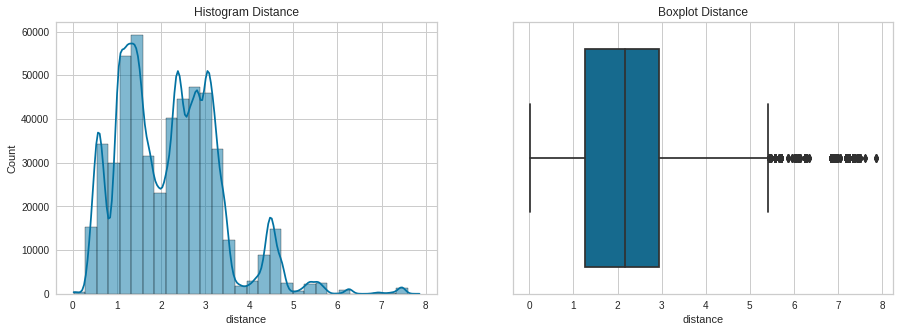

In [35]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(x_train['distance'],kde=True,bins =30)
plt.title('Histogram Distance')

plt.subplot(1,2,2)
sns.boxplot(x_train['distance'])
plt.title('Boxplot Distance');

mari kita handling outlier dengan metode IQR

In [36]:
quartiles = percentile(x_train['distance'], [25, 50, 75])                    #menghitung kuartil

fav_min, fav_max = x_train['distance'].min(), x_train['distance'].max()       #menghitung min dan max

q1 = quartiles[0]
q2 = quartiles[1]                                                           #menghitung median
q3 = quartiles[2]

print('Min: %.3f' % fav_min)
print('Q1: %.3f' % q1)
print('Median: %.3f' % q2)                                                  #memanggil rumus diatas
print('Q3: %.3f' % q3)
print('Max: %.3f' % fav_max)

Min: 0.020
Q1: 1.270
Median: 2.160
Q3: 2.930
Max: 7.860


kita akan menerapkan batas atas dan bawah dengan dikali 1,5 karena nilai skew tidak terlalu tinggi

In [37]:
iqr = q3 - q1                           #rumus IQR
   
up_bound = q3 + 1.5*iqr                   #rumus batas atas

lo_bound = q1 - 1.5*iqr                   #rumus batas bawah

print('IQR = ', iqr)
print('Batas Atas = ', up_bound)        #memanggil 3 rumus diatas
print('Batas Bawah = ', lo_bound)

IQR =  1.6600000000000001
Batas Atas =  5.42
Batas Bawah =  -1.2200000000000002


kita hapus index yang melewati batas atas dan bawah. lalu kita lihat visualisasinya

In [38]:
x_train = x_train[(x_train.distance > lo_bound) & (x_train.distance < up_bound)]

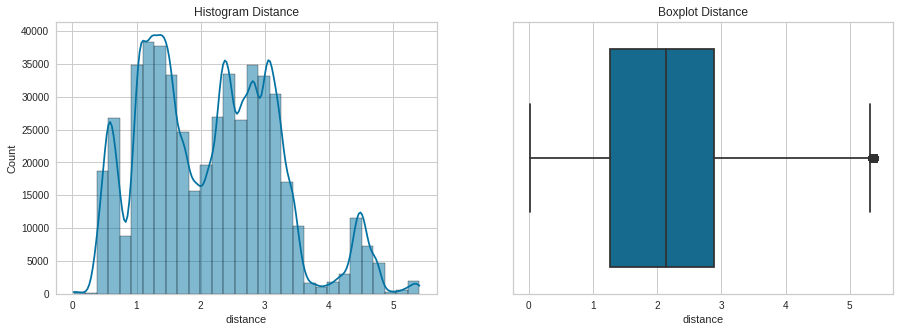

In [39]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(x_train['distance'],kde=True,bins =30)
plt.title('Histogram Distance')

plt.subplot(1,2,2)
sns.boxplot(x_train['distance'])
plt.title('Boxplot Distance');

sekarang mari kita lihat distribusi data tersebut sudah normal atau belum

In [40]:
x_train['distance'].skew()

0.4650676608289348

sekarang dapat dilihat data tersebut sudah terdistribusi dengan normal. lalu kita pun akan melakukan hal yang sama pada y_train dengan menyamakan index pada x_train

In [41]:
y_train = y_train[y_train.index.isin(x_train.index)]

setelah itu kita akan memisahkan kolom train test berdasarkan kategorikal dan numerik

In [42]:
num_col = ['distance']
cat_col = ['cab_type', 'name', 'surge_multiplier']

print(f'Number of numerical columns: {len(num_col)}')
print(f'Numerical columns: {num_col}')
print(f'Number of categorical columns: {len(cat_col)}')
print(f'Categorical columns: {cat_col}')

x_train_num = x_train[num_col]
x_train_cat = x_train[cat_col]

x_test_num = x_test[num_col]
x_test_cat = x_test[cat_col]

Number of numerical columns: 1
Numerical columns: ['distance']
Number of categorical columns: 3
Categorical columns: ['cab_type', 'name', 'surge_multiplier']


setelah kita melakukan pemisahan train test berdasarkan tipe kolom. kita akan melakukan langkah scaling dan encoding

### Features Scaling

Sekarang kita akan mengecek kolom numerik untuk dilakukan scaling

In [43]:
x_train_num

,distance
613406,1.90
594265,1.32
486324,2.38
452986,1.01
234459,1.03
...,...
79608,2.50
533613,1.50
511529,1.26
534152,1.70


kita akan melakukan normalisasi menggunakan standard scaler karena setelah melakukan handling outlier, ternyata masih ada sedikit outliers dengan distribusi sudah normal. maka dari itu kita akan melalukan scaling pada kolom numerik karena agar tidak sensitif pada outliers

In [44]:
scaler = StandardScaler()
x_train_num_scaled = scaler.fit_transform(x_train_num)
x_test_num_scaled = scaler.transform(x_test_num)

x_train_num_scaled

array([[-0.23088332],
       [-0.77989933],
       [ 0.22347476],
       ...,
       [-0.83669409],
       [-0.42019918],
       [ 0.99020401]])

sekarang kita telah mengetahui value untuk kolom numerik. setelah itu kita akan melakukan encoding untuk kolom categorikal

### Features Encoding

kita akan cek terlebih dahulu kolom kategorikal train test

In [45]:
x_train_cat

,cab_type,name,surge_multiplier
613406,Uber,WAV,1.0
594265,Lyft,Shared,1.0
486324,Uber,UberX,1.0
452986,Lyft,Lux,1.0
234459,Uber,Black,1.0
...,...,...,...
79608,Lyft,Lux Black XL,1.0
533613,Uber,UberXL,1.0
511529,Uber,UberPool,1.0
534152,Lyft,Lyft,1.0


untuk kolom kategorikal, kita akan menggunakan one hot encoder karena pada kolom cab_type dan name tidak memiliki level pada setiap value

In [46]:
encoder = OneHotEncoder(sparse=False)
x_train_cat_encoded = encoder.fit_transform(x_train_cat)
x_test_cat_encoded = encoder.transform(x_test_cat)
x_train_cat_encoded

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

setelah melakukan encoding pada 2 kolom. kita akan mengganti kolom berdasarkan 2 kolom yang memilliki unique values

In [47]:
feature_names = encoder.get_feature_names_out(input_features = cat_col)     
x_train_cat_encoded = pd.DataFrame(x_train_cat_encoded, columns = feature_names) 
x_test_cat_encoded = pd.DataFrame(x_test_cat_encoded, columns = feature_names) 
x_train_cat_encoded.head()

,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,surge_multiplier_1.0,surge_multiplier_1.25,surge_multiplier_1.5,surge_multiplier_1.75,surge_multiplier_2.0,surge_multiplier_2.5,surge_multiplier_3.0
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


mari kita lihat hasil data train dan test 

In [48]:
x_test_cat_encoded.head()

,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,surge_multiplier_1.0,surge_multiplier_1.25,surge_multiplier_1.5,surge_multiplier_1.75,surge_multiplier_2.0,surge_multiplier_2.5,surge_multiplier_3.0
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Concat between Numeric Columns and Categorical Columns

sekarang kita akan melakukan penggabungan antara kedua fitur yang telah kita encoding dan scaling

In [49]:
x_train = x_train_cat_encoded.copy()

In [50]:
x_train['distance'] = x_train_num_scaled 

In [51]:
col = x_train.pop('distance')
x_train.insert(14, 'distance', col)

In [52]:
x_train

,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,distance,surge_multiplier_1.0,surge_multiplier_1.25,surge_multiplier_1.5,surge_multiplier_1.75,surge_multiplier_2.0,surge_multiplier_2.5,surge_multiplier_3.0
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.230883,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.779899,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.223475,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.073339,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.054407,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504846,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.337064,1.0,0.0,0.0,0.0,0.0,0.0,0.0
504847,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.609515,1.0,0.0,0.0,0.0,0.0,0.0,0.0
504848,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.836694,1.0,0.0,0.0,0.0,0.0,0.0,0.0
504849,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.420199,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
x_test = x_test_cat_encoded.copy()
x_test['distance'] = x_test_num_scaled
col = x_test.pop('distance')
x_test.insert(14, 'distance', col)

In [54]:
x_test

,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,distance,surge_multiplier_1.0,surge_multiplier_1.25,surge_multiplier_1.5,surge_multiplier_1.75,surge_multiplier_2.0,surge_multiplier_2.5,surge_multiplier_3.0
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.015227,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.100419,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.552720,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.328915,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.942875,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127591,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.751502,1.0,0.0,0.0,0.0,0.0,0.0,0.0
127592,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.857683,1.0,0.0,0.0,0.0,0.0,0.0,0.0
127593,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.476994,1.0,0.0,0.0,0.0,0.0,0.0,0.0
127594,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.518231,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
x_test.reset_index(drop=True, inplace=True)
x_train.reset_index(drop=True, inplace=True)


In [56]:
y_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

setelah itu kita cek kembali kolom yang ada pada data yang sudah diperbaharui

In [57]:
num_col

['distance']

In [58]:
x_train_cat_encoded.columns

Index(['cab_type_Lyft', 'cab_type_Uber', 'name_Black', 'name_Black SUV', 'name_Lux', 'name_Lux Black', 'name_Lux Black XL', 'name_Lyft', 'name_Lyft XL', 'name_Shared', 'name_UberPool', 'name_UberX', 'name_UberXL', 'name_WAV', 'surge_multiplier_1.0', 'surge_multiplier_1.25', 'surge_multiplier_1.5', 'surge_multiplier_1.75', 'surge_multiplier_2.0', 'surge_multiplier_2.5', 'surge_multiplier_3.0'], dtype='object')

# vi. Model Definition

pada bagian ini, kita akan melakukan linear regression model. 

In [60]:
model = LinearRegression()

In [61]:
x_train.shape

(504851, 22)

In [62]:
y_train.shape

(504851,)

# vii. Model Training

pada model training, kita akan melakukan fit pada variabel train

In [63]:
model.fit(x_train, y_train)

LinearRegression()

# viii. Model Evaluation

pada bagian ini kita akan melakukan evaluasi model seperti melakukan predict pada variabel x yang dimasukan kepada variabel y_pred, mencari nilai MAE, MSE, RMSE, R2, dan MAPE

In [64]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

y_pred_train

array([ 9.04882812,  3.56365967, 10.4108429 , ...,  6.22523499,
        7.54060364, 18.56208801])

In [65]:
print("MAE Train:",mean_absolute_error(y_train,y_pred_train))
print("MAE Test:",mean_absolute_error(y_test,y_pred_test))
print("MSE Train:",mean_squared_error(y_train,y_pred_train))
print("MSE Test:",mean_squared_error(y_test,y_pred_test))
print("RMSE Train:",np.sqrt(mean_squared_error(y_train,y_pred_train)))
print("RMSE Test:",np.sqrt(mean_squared_error(y_test,y_pred_test)))
print("R2 Score Train:",r2_score(y_train,y_pred_train))
print("R2 Score Test:",r2_score(y_test,y_pred_test))
print("MAPE Train:",mean_absolute_percentage_error(y_train,y_pred_train))
print("MAPE Test:",mean_absolute_percentage_error(y_test,y_pred_test))

MAE Train: 1.7424448611291996
MAE Test: 1.7755018517852872
MSE Train: 5.98136773161019
MSE Test: 6.223022528100274
RMSE Train: 2.445683489663
RMSE Test: 2.4945986707485184
R2 Score Train: 0.9298696761377512
R2 Score Test: 0.9280176114864148
MAPE Train: 0.13448054361940368
MAPE Test: 0.13553239896735664


dari hasil MAE yang merupakan perbandingan error untuk semua data terhadap model. pada train dan juga test yang tidak terlalu jauh berada di sekitar 1,7 yang berarti error pada data kita dapat dibilang cukup rendah

# ix. Model Saving

kita akan menyimpan model yang ada pada notebook menjadi file yang nantinya akan di load pada model inference

In [66]:
with open('model_lin_reg.pkl','wb') as file_1:
    joblib.dump(model, file_1)

with open('model_scaler.pkl', 'wb') as file_2:
     joblib.dump(scaler, file_2)

with open('model_OHE_encoder.pkl', 'wb') as file_3:
     joblib.dump(encoder, file_3)

with open('list_num_col.txt', 'w') as file_4:
     json.dump(num_col, file_4)

with open('list_cat_col.txt', 'w') as file_5:
     json.dump(cat_col, file_5)

# x. Conclusion

dari hasil permodelan diatas dapat kesimpulan bahwa:

- kolom price memiliki hubungan terhadap kolom name, cab_type, surge_multiplier, distance
- hasil MAE pada train maupun test terdapat perbedaan nilai yang tidak signifikan yang berarti model tersebut tidak underfit maupun overfit
- dari hasil R2 score menjelaskan bahwa model data kita tergolong baik didukung dengan model linear regresion
- dari hasil MAPE yang ada, menunjukan bahwa 13% persentasi error dari model yang telah dibuat


# xi. Conceptual Problem

### Question 1

1. Sebutkan dan jelaskan asumsi yang dipakai oleh Linear Regression !

### Answer 1

1. Linear Relationship merupakan relasi linier merujuk pada hubungan antara dua variabel di mana perubahan pada satu variabel secara langsung sebanding dengan perubahan pada variabel lainnya.
2. little or no multicolinearity adalah sebuah istilah statistik yang merujuk pada kondisi di mana dua atau lebih variabel independen dalam sebuah model regresi memiliki hubungan yang sangat kuat sehingga sulit untuk membedakan dampak masing-masing variabel terhadap variabel dependen.
3. Multivariate normality merujuk pada kondisi di mana distribusi dari beberapa variabel secara bersamaan dalam sebuah populasi atau sampel mengikuti distribusi normal multivariat. Dalam hal ini, distribusi dari setiap variabel secara individu juga mengikuti distribusi normal.
4. little or no autocorrelation among residues merujuk pada kondisi di mana ada ketergantungan statistik antara nilai residual dalam sebuah model regresi dan nilai residual pada waktu sebelumnya atau sesudahnya. Dalam hal ini, nilai residual di suatu waktu tertentu tidak independen secara statistik dari nilai residual pada waktu sebelumnya atau sesudahnya.
5. homoscedasticity of the error should be random to all your predicted values adalah kondisi di mana variansi atau dispersi dari nilai residual (error) dalam sebuah model regresi adalah konstan di seluruh rentang nilai prediksi (predicted values). Dalam hal ini, variansi dari nilai residual tidak bergantung pada nilai prediksi, sehingga distribusi nilai residual memiliki pola yang sama di setiap titik pada rentang nilai prediksi.

### Question 2

2. Tunjukkan dan tafsirkan arti dari coefficient dan slope yang didapat dari model yang telah Anda bangun !

### Answer

Intercept (atau konstanta) adalah nilai pada sumbu y ketika nilai pada sumbu x adalah nol. Dalam persamaan regresi linear, intercept merupakan nilai prediksi saat variabel bebas (x) bernilai nol.

Slope (atau kemiringan) adalah ukuran perubahan dalam variabel respons (y) yang terjadi ketika variabel bebas (x) berubah satu satuan. Dalam persamaan regresi linear, slope merupakan koefisien yang menggambarkan seberapa cepat variabel respons (y) berubah ketika variabel bebas (x) berubah.

In [73]:
print('Intercept : ', model.intercept_)
print('Slope     : ', model.coef_)

Intercept :  108353435711.28236
Slope     :  [ 3.20891237e+11 -1.23917732e+11 -1.11357968e+10 -1.11357968e+10
 -4.55944766e+11 -4.55944766e+11 -4.55944766e+11 -4.55944766e+11
 -4.55944766e+11 -4.55944766e+11 -1.11357968e+10 -1.11357968e+10
 -1.11357968e+10 -1.11357968e+10  3.01754094e+00  2.67000928e+10
  2.67000928e+10  2.67000928e+10  2.67000928e+10  2.67000928e+10
  2.67000928e+10  2.67000928e+10]


berdasarkan hasil diatas dapat dilihat hasil intercept sebesar 108353435711 dan banyak nilai hasil dari koefisien/slope

berdasarkan rumus yang kita miliki berarti 

y = m1x1 + m2x2 + m3x3 +........ + b
- m: slope
- x: titik data
- b: intercept